In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data=pd.read_csv('/content/spam.csv', encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
data.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
data.drop_duplicates(inplace=True,keep='first')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5169 non-null   object
 1   v2      5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


In [ ]:
data.describe()

,v1,v2
count,5169,5169
unique,2,5169
top,ham,Rofl. Its true to its name
freq,4516,1


In [ ]:
data.columns=['Target','Message']
data.head()

,Target,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data['Target']=data['Target'].apply(lambda x: 1 if x=='spam' else 0)

In [ ]:
data['Message'].str.lower().head()

,Message
0,"go until jurong point, crazy.. available only ..."
1,ok lar... joking wif u oni...
2,free entry in 2 a wkly comp to win fa cup fina...
3,u dun say so early hor... u c already then say...
4,"nah i don't think he goes to usf, he lives aro..."


In [ ]:
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')


stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords & apply stemming
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    # Join back into one string
    return ' '.join(tokens)

# Apply cleaning to dataset
data['Cleaned_Message'] = data['Message'].apply(clean_text)
display(data.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,Target,Message,Cleaned_Message
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though


In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc=wc.generate(data[data['Target']==1]['Cleaned_Message'].str.cat(sep=" "))

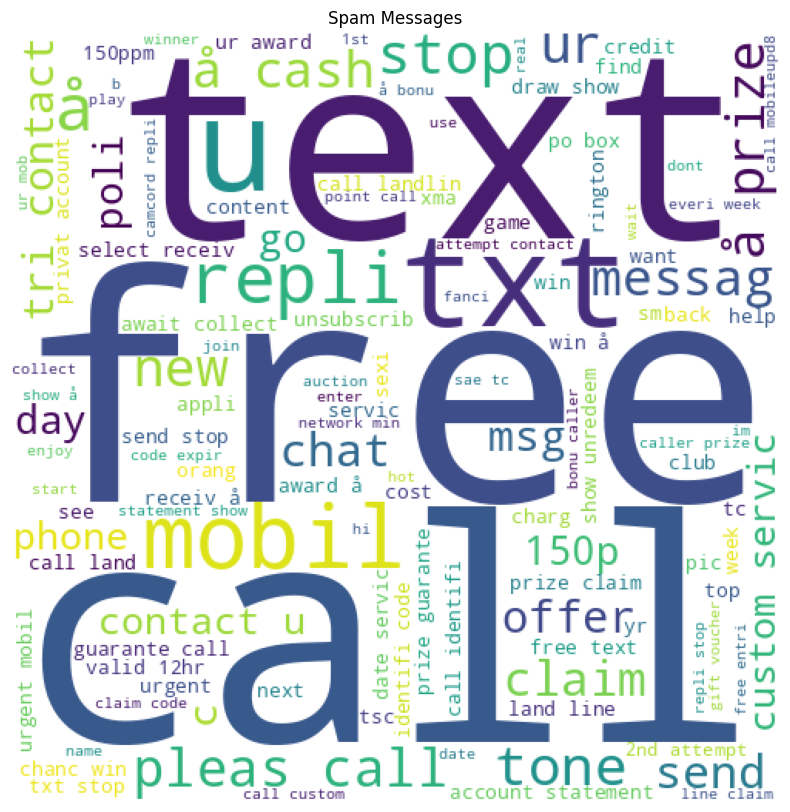

In [ ]:
plt.figure(figsize=(20, 10))
plt.imshow(spam_wc)
plt.axis('off')
plt.title('Spam Messages')
plt.show()

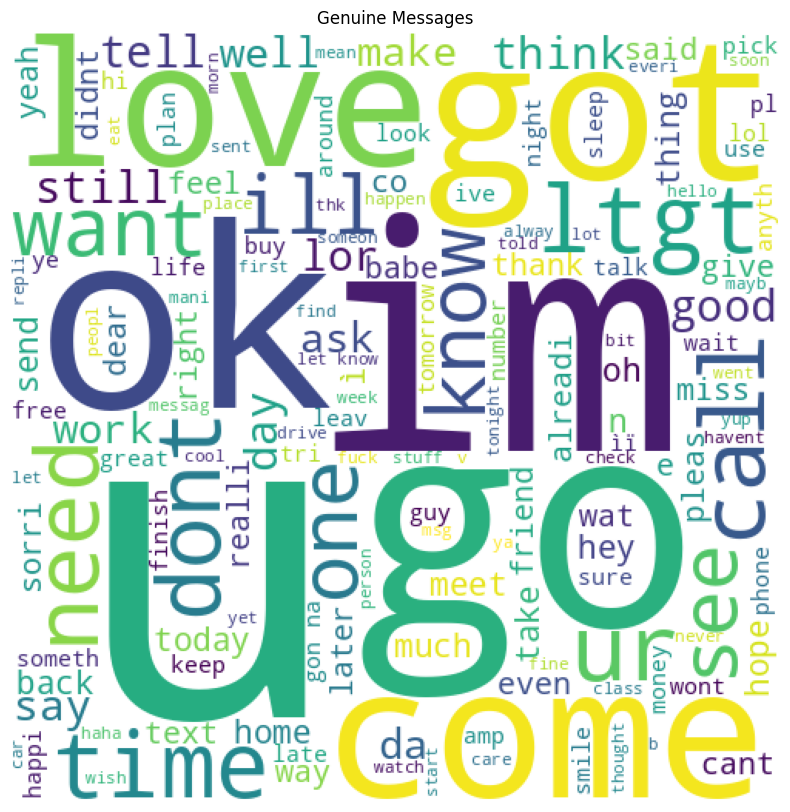

In [ ]:
ham_wc=wc.generate(data[data['Target']==0]['Cleaned_Message'].str.cat(sep=" "))
plt.figure(figsize=(20, 10))
plt.imshow(ham_wc)
plt.axis('off')
plt.title('Genuine Messages')
plt.show()

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfid=TfidfVectorizer(max_features=3000)

In [ ]:
X=tfid.fit_transform(data['Cleaned_Message']).toarray()
X.shape

(5169, 3000)

In [ ]:
y=data['Target'].values

In [ ]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        cm = confusion_matrix(y_train, pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['ham', 'spam'])
        disp.plot()
        plt.title('Confusion Matrix (Train)')
        plt.show()
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        cm = confusion_matrix(y_test, pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['ham', 'spam'])
        disp.plot()
        plt.title('Confusion Matrix (Test)')
        plt.show()

In [ ]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
mnb=MultinomialNB()
gnb=GaussianNB()
bnb=BernoulliNB()

Train Result:
Accuracy Score: 97.92%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.977352    0.995305  0.979202     0.986329      0.979558
recall        0.999449    0.834646  0.979202     0.917047      0.979202
f1-score      0.988277    0.907923  0.979202     0.948100      0.978405
support    3627.000000  508.000000  0.979202  4135.000000   4135.000000
_______________________________________________


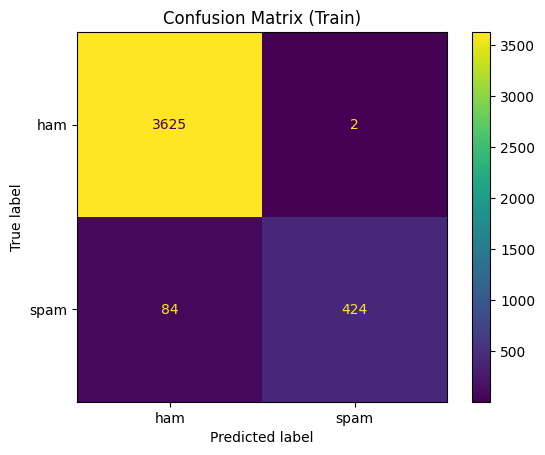

Test Result:
Accuracy Score: 97.39%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.970524    1.000000  0.973888     0.985262      0.974657
recall       1.000000    0.813793  0.973888     0.906897      0.973888
f1-score     0.985042    0.897338  0.973888     0.941190      0.972743
support    889.000000  145.000000  0.973888  1034.000000   1034.000000
_______________________________________________


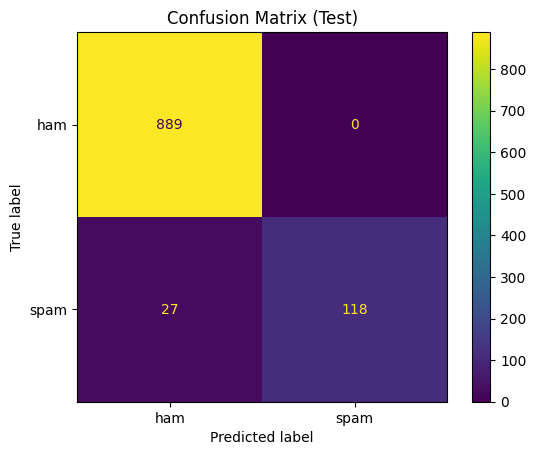

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
mnb.fit(X_train,y_train)
print_score(mnb, X_train, y_train, X_test, y_test, train=True)
print_score(mnb, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 89.84%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     1.000000    0.547414  0.898428     0.773707      0.944398
recall        0.884202    1.000000  0.898428     0.942101      0.898428
f1-score      0.938543    0.707521  0.898428     0.823032      0.910161
support    3627.000000  508.000000  0.898428  4135.000000   4135.000000
_______________________________________________


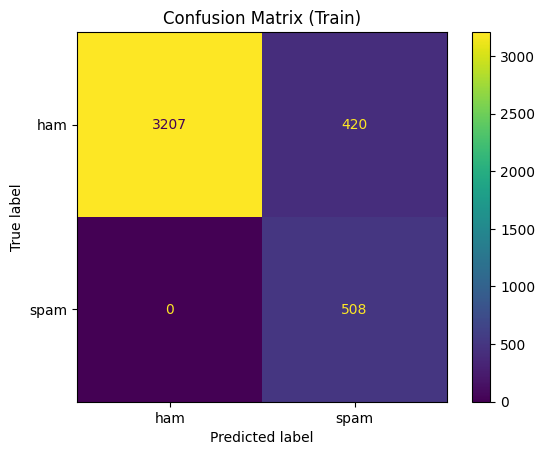

Test Result:
Accuracy Score: 86.85%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.972396    0.518987  0.868472     0.745692      0.908814
recall       0.871766    0.848276  0.868472     0.860021      0.868472
f1-score     0.919336    0.643979  0.868472     0.781657      0.880722
support    889.000000  145.000000  0.868472  1034.000000   1034.000000
_______________________________________________


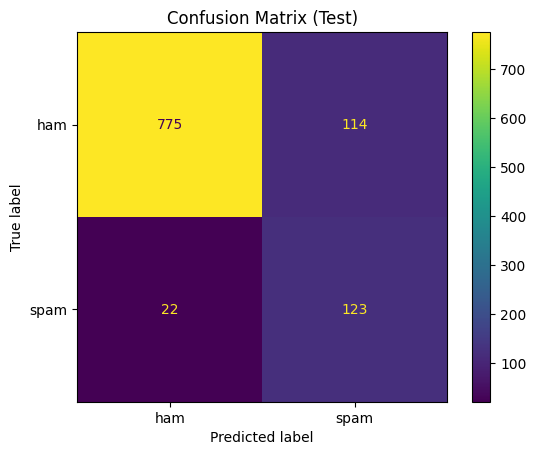

In [ ]:
gnb.fit(X_train,y_train)
print_score(gnb, X_train, y_train, X_test, y_test, train=True)
print_score(gnb, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 98.65%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.985322    0.995614  0.986457     0.990468      0.986587
recall        0.999449    0.893701  0.986457     0.946575      0.986457
f1-score      0.992335    0.941909  0.986457     0.967122      0.986140
support    3627.000000  508.000000  0.986457  4135.000000   4135.000000
_______________________________________________


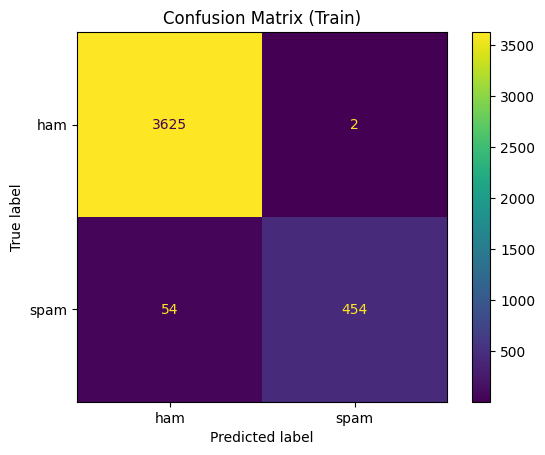

Test Result:
Accuracy Score: 97.29%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.971522    0.983471  0.972921     0.977497      0.973198
recall       0.997750    0.820690  0.972921     0.909220      0.972921
f1-score     0.984462    0.894737  0.972921     0.939599      0.971879
support    889.000000  145.000000  0.972921  1034.000000   1034.000000
_______________________________________________


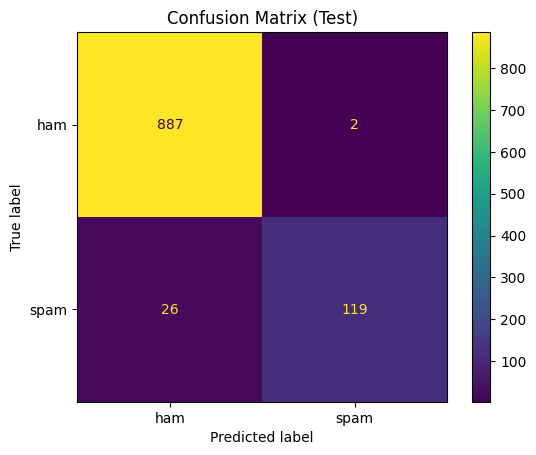

In [ ]:
bnb.fit(X_train,y_train)
print_score(bnb, X_train, y_train, X_test, y_test, train=True)
print_score(bnb, X_train, y_train, X_test, y_test, train=False)

In [ ]:
import joblib
joblib.dump(mnb, 'mnb_model.pkl')
joblib.dump(tfid, 'tfidf_vectorizer.pkl')